In [5]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

# Read Data
audi = pd.read_csv("audi.csv")
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [6]:
encoder = LabelEncoder()
audi['model'] = encoder.fit_transform(audi['model'])
model_mapping = {index : label for index, label in enumerate(encoder.classes_)}
model_mapping


{0: ' A1',
 1: ' A2',
 2: ' A3',
 3: ' A4',
 4: ' A5',
 5: ' A6',
 6: ' A7',
 7: ' A8',
 8: ' Q2',
 9: ' Q3',
 10: ' Q5',
 11: ' Q7',
 12: ' Q8',
 13: ' R8',
 14: ' RS3',
 15: ' RS4',
 16: ' RS5',
 17: ' RS6',
 18: ' RS7',
 19: ' S3',
 20: ' S4',
 21: ' S5',
 22: ' S8',
 23: ' SQ5',
 24: ' SQ7',
 25: ' TT'}

In [7]:
audi['transmission'] = encoder.fit_transform(audi['transmission'])
transmission_mapping = {index : label for index, label in enumerate(encoder.classes_)}
transmission_mapping

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [8]:
audi['fuelType'] = encoder.fit_transform(audi['fuelType'])
fuelType_mapping = {index : label for index, label in enumerate(encoder.classes_)}
fuelType_mapping

{0: 'Diesel', 1: 'Hybrid', 2: 'Petrol'}

In [9]:
X = audi.drop('price', axis=1)
y = audi['price']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=30,random_state=0)

In [11]:
models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'RF':RandomForestRegressor()
    
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    evs = explained_variance_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print("Model:", name)
    print("Explained Variance Score:", evs)
    print("R^2 Score:", r2)
    print("RMSE:", rmse)
    print()


Model: OLS
Explained Variance Score: 0.5996838219623882
R^2 Score: 0.5968641922659105
RMSE: 5651.595277608177

Model: Ridge
Explained Variance Score: 0.5999421885738201
R^2 Score: 0.5971348089999575
RMSE: 5649.698059624313

Model: Lasso
Explained Variance Score: 0.5999657460108935
R^2 Score: 0.5971582999066681
RMSE: 5649.533341416157

Model: Elastic Net
Explained Variance Score: 0.7898455020313055
R^2 Score: 0.7742576387237083
RMSE: 4229.138398881654



Model: RF
Explained Variance Score: 0.9810591083250477
R^2 Score: 0.9763503912100681
RMSE: 1368.8546843322106



<Axes: >

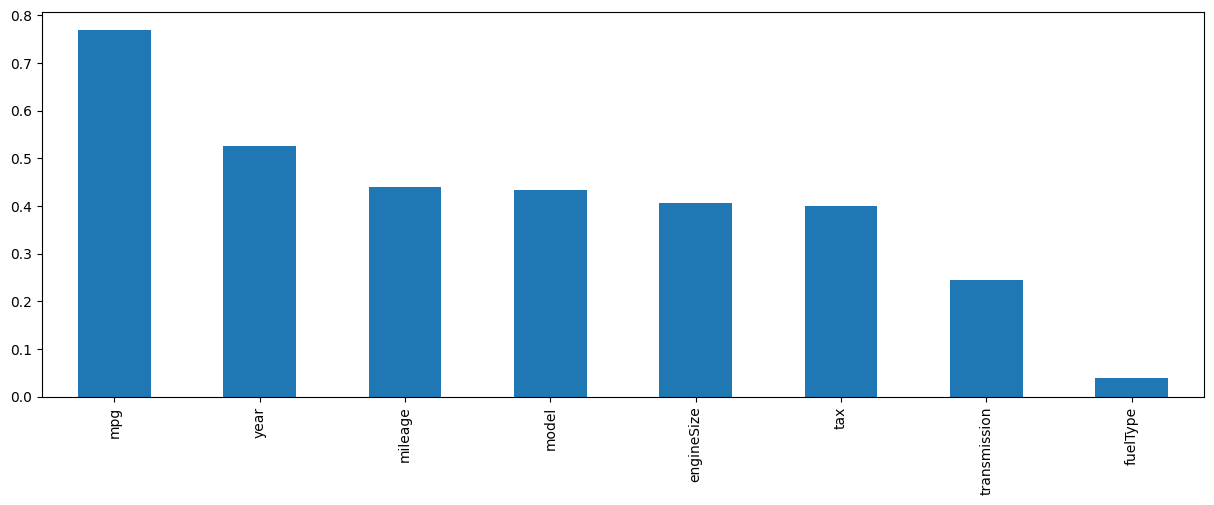

In [12]:
# Feature Selection
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,
 #   test_size=0.2,
 #   random_state=0)
from sklearn.feature_selection import mutual_info_regression, SelectPercentile
mutual_info = mutual_info_regression(x_train, y_train)
mutual_info
mutual_info = pd.Series(mutual_info)

x_train = pd.DataFrame(x_train)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


In [14]:
X1 = X.iloc[:, np.argsort(mutual_info)[2:]]

In [24]:
columns_to_check = ['tax', 'engineSize', 'mileage', 'year', 'mpg']

# Find min and max for each column
min_values = X1[columns_to_check].min()
max_values = X1[columns_to_check].max()

# Display the results
print("Minimum values:")
print(min_values)

print("\nMaximum values:")
print(max_values)

Minimum values:
tax              0.0
engineSize       0.0
mileage          1.0
year          1997.0
mpg             18.9
dtype: float64

Maximum values:
tax              580.0
engineSize         6.3
mileage       323000.0
year            2020.0
mpg              188.3
dtype: float64


In [16]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=30,random_state=0)

In [17]:
models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'RF':RandomForestRegressor()
    
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    evs = explained_variance_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print("Model:", name)
    print("Explained Variance Score:", evs)
    print("R^2 Score:", r2)
    print("RMSE:", rmse)
    print()


Model: OLS
Explained Variance Score: 0.6104022564653511
R^2 Score: 0.6079448823495279
RMSE: 5573.383526317822

Model: Ridge
Explained Variance Score: 0.6106093643687307
R^2 Score: 0.6081617727152309
RMSE: 5571.841676248608

Model: Lasso
Explained Variance Score: 0.6106048739241188
R^2 Score: 0.608156945661881
RMSE: 5571.875995889118

Model: Elastic Net
Explained Variance Score: 0.7886912020350999
R^2 Score: 0.7710398098683418
RMSE: 4259.173723712406

Model: RF
Explained Variance Score: 0.9802464906302712
R^2 Score: 0.9784316716499935
RMSE: 1307.2348255037857



In [21]:
#Print predictions and actual values
y_pred = model.predict(x_test)
#y_pred_t = ridge_t.predict(X_test_scaled)
print("Predictions from baseline model:",y_pred[:2])
#print("Predictions from tuned model:",y_pred_t[:2])
print("Actual:",y_test[:2])

# An example of my prediction task
# My predictions and the actuaal values were quite close
# $2500 and $20000 difference
# And baseline model values were further
# Thus, i think my model did a decent job in predicting 

Predictions from baseline model: [13658.24 23093.54]
Actual: 2049    14998
5609    21950
Name: price, dtype: int64


In [22]:
y_train_pred = model.predict(x_train)

r2_train = r2_score(y_train, y_train_pred)

y_test_pred = model.predict(x_test)

r2_test = r2_score(y_test, y_test_pred)

print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)

R-squared (Train): 0.9933023267058597
R-squared (Test): 0.9784316716499935


In [23]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
# Score the model
expected = y_test
predicted = model.predict(x_test)
import pickle
with open('../application/static/joblib_Model.pkl', 'wb') as f:
    pickle.dump(model, f)

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/ea/1e/a944a93c33e5cf495b0eb0c5e7e81f707c6b4d0dc5e54fb38ad2734da762/fonttools-4.46.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/159.4 kB ? eta -:-


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
